In [68]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
from collections import defaultdict

In [47]:
def load_transactions(path):
      """Load transaction data from JSON file"""
      try:
          with open(path, 'r') as f:
              data = json.load(f)

          # Handle both single object and array formats
          if isinstance(data, dict):
              data = [data]

          df = pd.DataFrame(data)
          print(f"Loaded {len(df)} transactions")
          return df
      except Exception as e:
          print(f"Error loading data: {e}")
          return pd.DataFrame()

In [48]:
data =load_transactions( '/content/drive/MyDrive/user-wallet-transactions.json')

Loaded 100000 transactions


In [49]:
def load_and_explore_data(data):
    """ Load and explore data """

    # Convert to DataFrame
    if isinstance(data, dict):
        data = [data]

    df = pd.DataFrame(data)

    print(f"Loaded {len(df)} transactions")
    print(f"Found {df['userWallet'].nunique()} unique wallets")
    print(f"Columns: {list(df.columns)}")

    # Basic stats
    print(f"\nTransaction Actions:")
    print(df['action'].value_counts())

    print(f"\nNetworks:")
    print(df['network'].value_counts())

    print(f"\nProtocols:")
    print(df['protocol'].value_counts())

    # Sample transaction
    print(f"\nSample transaction structure:")
    print(df.iloc[0])

    return df


In [50]:
load_and_explore_data(data)

Loaded 100000 transactions
Found 3497 unique wallets
Columns: ['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId', 'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt', 'updatedAt']

Transaction Actions:
action
deposit             37808
redeemunderlying    32305
borrow              17086
repay               12553
liquidationcall       248
Name: count, dtype: int64

Networks:
network
polygon    100000
Name: count, dtype: int64

Protocols:
protocol
aave_v2    100000
Name: count, dtype: int64

Sample transaction structure:
_id                         {'$oid': '681d38fed63812d4655f571a'}
userWallet            0x00000000001accfa9cef68cf5371a23025b6d4b6
network                                                  polygon
protocol                                                 aave_v2
txHash         0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...
logId          0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...
timestamp                                             1

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,1629178166,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,1621525013,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,1627118913,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,1627773318,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,1618845907,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,{'$oid': '681c85447b724ae36a6df5c9'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x7c94fbaff37d45ed220e4eeac4e7f14f3476af596d12...,0x7c94fbaff37d45ed220e4eeac4e7f14f3476af596d12...,1623421245,1623421245,repay,"{'type': 'Repay', 'amount': '19724448273', 'as...",0,{'$date': '2025-05-08T10:19:50.145Z'},{'$date': '2025-05-08T10:19:50.145Z'}
99996,{'$oid': '681c8d5b7b724ae36a70c446'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x04046c738ffa8a64323e0b8cb4b7a97883c722728e98...,0x04046c738ffa8a64323e0b8cb4b7a97883c722728e98...,1623558779,1623558779,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '200000...",0,{'$date': '2025-05-08T10:54:21.390Z'},{'$date': '2025-05-08T10:54:21.390Z'}
99997,{'$oid': '681c8d5b7b724ae36a70c62f'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x77eab9a16e1b49a53365882b82786cf86263e73b358e...,0x77eab9a16e1b49a53365882b82786cf86263e73b358e...,1623559191,1623559191,deposit,"{'type': 'Deposit', 'amount': '199401391185794...",0,{'$date': '2025-05-08T10:54:21.403Z'},{'$date': '2025-05-08T10:54:21.403Z'}
99998,{'$oid': '681c8d5b7b724ae36a70c752'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0xf170ce9fed71fa7b8221f08fe8a601c5bf84b6f8e724...,0xf170ce9fed71fa7b8221f08fe8a601c5bf84b6f8e724...,1623559417,1623559417,borrow,"{'type': 'Borrow', 'amount': '4000000000', 'as...",0,{'$date': '2025-05-08T10:54:21.411Z'},{'$date': '2025-05-08T10:54:21.411Z'}


In [51]:
def preprocess_data(df):
    """
     Cleaning and preprocessing the data
    """

    # Convert timestamps
    df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
    print(f"Converted timestamps to datetime")

    # Sort by wallet and timestamp
    df = df.sort_values(['userWallet', 'datetime'])
    print(f"Sorted data by wallet and time")

    # Basic data quality checks
    print(f"\nData Quality:")
    print(f"- Missing userWallet: {df['userWallet'].isnull().sum()}")
    print(f"- Missing timestamp: {df['timestamp'].isnull().sum()}")
    print(f"- Missing action: {df['action'].isnull().sum()}")

    # Date range
    print(f"- Date range: {df['datetime'].min()} to {df['datetime'].max()}")

    return df


In [52]:
df = preprocess_data(data)

Converted timestamps to datetime
Sorted data by wallet and time

Data Quality:
- Missing userWallet: 0
- Missing timestamp: 0
- Missing action: 0
- Date range: 2021-03-31 17:00:04 to 2021-09-02 17:54:35


In [24]:
def engineer_features_single_wallet(wallet_data):
    """
    Engineer features for a single wallet (for demonstration)
    """

    group = wallet_data.copy()
    features = {}
    wallet_id = group['userWallet'].iloc[0]

    print(f"Analyzing wallet: {wallet_id}")
    print(f"Transactions: {len(group)}")

    #BASIC ACTIVITY METRICS
    features['total_transactions'] = len(group)
    features['unique_days_active'] = group['datetime'].dt.date.nunique()
    features['activity_span_days'] = (group['datetime'].max() - group['datetime'].min()).days + 1
    features['avg_daily_transactions'] = features['total_transactions'] / max(features['activity_span_days'], 1)

    print(f"\nActivity Metrics:")
    print(f"- Total transactions: {features['total_transactions']}")
    print(f"- Unique days active: {features['unique_days_active']}")
    print(f"- Activity span: {features['activity_span_days']} days")
    print(f"- Avg daily transactions: {features['avg_daily_transactions']:.2f}")

    # ACTION DISTRIBUTION
    action_counts = group['action'].value_counts()
    total_actions = len(group)

    features['deposit_ratio'] = action_counts.get('deposit', 0) / total_actions
    features['borrow_ratio'] = action_counts.get('borrow', 0) / total_actions
    features['repay_ratio'] = action_counts.get('repay', 0) / total_actions
    features['redeem_ratio'] = action_counts.get('redeemunderlying', 0) / total_actions
    features['liquidation_ratio'] = action_counts.get('liquidationcall', 0) / total_actions

    print(f"\nAction Distribution:")
    for action, ratio in [('deposit', features['deposit_ratio']),
                         ('borrow', features['borrow_ratio']),
                         ('repay', features['repay_ratio']),
                         ('redeem', features['redeem_ratio']),
                         ('liquidation', features['liquidation_ratio'])]:
        print(f"- {action}: {ratio:.2%}")

    # === FINANCIAL BEHAVIOR ===
    amounts_usd = []
    for _, row in group.iterrows():
        if 'actionData' in row and row['actionData'] and 'amount' in row['actionData']:
            amount = float(row['actionData']['amount'])
            price = float(row['actionData'].get('assetPriceUSD', 0))

            # Handle different decimal places
            symbol = row['actionData'].get('assetSymbol', '')
            if symbol in ['USDC', 'USDT']:  # 6 decimals
                amount = amount / 1e6
            elif symbol in ['WETH', 'DAI', 'WMATIC']:  # 18 decimals
                amount = amount / 1e18
            else:  # Default to 18 decimals
                amount = amount / 1e18

            usd_value = amount * price
            amounts_usd.append(usd_value)

    if amounts_usd:
        features['total_volume_usd'] = sum(amounts_usd)
        features['avg_transaction_size_usd'] = np.mean(amounts_usd)
        features['median_transaction_size_usd'] = np.median(amounts_usd)
        features['max_transaction_size_usd'] = max(amounts_usd)

        print(f"\nFinancial Metrics:")
        print(f"- Total volume: ${features['total_volume_usd']:.2f}")
        print(f"- Avg transaction: ${features['avg_transaction_size_usd']:.2f}")
        print(f"- Max transaction: ${features['max_transaction_size_usd']:.2f}")

    # === BEHAVIORAL PATTERNS ===
    borrows = action_counts.get('borrow', 0)
    repays = action_counts.get('repay', 0)
    deposits = action_counts.get('deposit', 0)
    redeems = action_counts.get('redeemunderlying', 0)

    features['repay_to_borrow_ratio'] = repays / max(borrows, 1)
    features['deposit_to_redeem_ratio'] = deposits / max(redeems, 1)

    print(f"\nBehavioral Patterns:")
    print(f"- Repay/Borrow ratio: {features['repay_to_borrow_ratio']:.2f}")
    print(f"- Deposit/Redeem ratio: {features['deposit_to_redeem_ratio']:.2f}")

    return features


In [32]:
engineer_features_single_wallet(data)

Analyzing wallet: 0x00000000001accfa9cef68cf5371a23025b6d4b6
Transactions: 100000

Activity Metrics:
- Total transactions: 100000
- Unique days active: 156
- Activity span: 156 days
- Avg daily transactions: 641.03

Action Distribution:
- deposit: 37.81%
- borrow: 17.09%
- repay: 12.55%
- redeem: 32.30%
- liquidation: 0.25%

Financial Metrics:
- Total volume: $1892399003.23
- Avg transaction: $18923.99
- Max transaction: $12742257.90

Behavioral Patterns:
- Repay/Borrow ratio: 0.73
- Deposit/Redeem ratio: 1.17


{'total_transactions': 100000,
 'unique_days_active': 156,
 'activity_span_days': 156,
 'avg_daily_transactions': 641.025641025641,
 'deposit_ratio': np.float64(0.37808),
 'borrow_ratio': np.float64(0.17086),
 'repay_ratio': np.float64(0.12553),
 'redeem_ratio': np.float64(0.32305),
 'liquidation_ratio': np.float64(0.00248),
 'total_volume_usd': 1892399003.2256322,
 'avg_transaction_size_usd': np.float64(18923.990032256712),
 'median_transaction_size_usd': np.float64(205.65110977590888),
 'max_transaction_size_usd': 12742257.89879186,
 'repay_to_borrow_ratio': np.float64(0.7346950719887627),
 'deposit_to_redeem_ratio': np.float64(1.1703451478099365)}

In [33]:
first_wallet_data = df[df['userWallet'] == df['userWallet'].iloc[0]]
sample_features = engineer_features_single_wallet(first_wallet_data)

Analyzing wallet: 0x00000000001accfa9cef68cf5371a23025b6d4b6
Transactions: 1

Activity Metrics:
- Total transactions: 1
- Unique days active: 1
- Activity span: 1 days
- Avg daily transactions: 1.00

Action Distribution:
- deposit: 100.00%
- borrow: 0.00%
- repay: 0.00%
- redeem: 0.00%
- liquidation: 0.00%

Financial Metrics:
- Total volume: $1987.66
- Avg transaction: $1987.66
- Max transaction: $1987.66

Behavioral Patterns:
- Repay/Borrow ratio: 0.00
- Deposit/Redeem ratio: 1.00


In [53]:
def engineer_all_features(df):
    """
    Step 3b: Engineer features for all wallets
    """

    wallet_features = {}
    wallet_count = 0
    total_wallets = df['userWallet'].nunique()

    for wallet, group in df.groupby('userWallet'):
        wallet_count += 1
        if wallet_count % 100 == 0 or wallet_count <= 5:  # Show progress for first 5 and every 100
            print(f"Processing wallet {wallet_count}/{total_wallets}: {wallet}")

        features = {}

        # ACTIVITY METRICS
        features['total_transactions'] = len(group)
        features['unique_days_active'] = group['datetime'].dt.date.nunique()
        features['activity_span_days'] = (group['datetime'].max() - group['datetime'].min()).days + 1
        features['avg_daily_transactions'] = features['total_transactions'] / max(features['activity_span_days'], 1)

        # ACTION DISTRIBUTION
        action_counts = group['action'].value_counts()
        total_actions = len(group)

        features['deposit_ratio'] = action_counts.get('deposit', 0) / total_actions
        features['borrow_ratio'] = action_counts.get('borrow', 0) / total_actions
        features['repay_ratio'] = action_counts.get('repay', 0) / total_actions
        features['redeem_ratio'] = action_counts.get('redeemunderlying', 0) / total_actions
        features['liquidation_ratio'] = action_counts.get('liquidationcall', 0) / total_actions

        # FINANCIAL BEHAVIOR
        amounts_usd = []
        for _, row in group.iterrows():
            if 'actionData' in row and row['actionData'] and 'amount' in row['actionData']:
                try:
                    amount = float(row['actionData']['amount'])
                    price = float(row['actionData'].get('assetPriceUSD', 0))

                    # Handle different decimal places
                    symbol = row['actionData'].get('assetSymbol', '')
                    if symbol in ['USDC', 'USDT']:
                        amount = amount / 1e6
                    elif symbol in ['WETH', 'DAI', 'WMATIC']:
                        amount = amount / 1e18
                    else:
                        amount = amount / 1e18

                    usd_value = amount * price
                    amounts_usd.append(usd_value)
                except:
                    continue

        if amounts_usd:
            features['total_volume_usd'] = sum(amounts_usd)
            features['avg_transaction_size_usd'] = np.mean(amounts_usd)
            features['median_transaction_size_usd'] = np.median(amounts_usd)
            features['max_transaction_size_usd'] = max(amounts_usd)
            features['transaction_size_std'] = np.std(amounts_usd)
            features['transaction_size_cv'] = features['transaction_size_std'] / max(features['avg_transaction_size_usd'], 1e-6)
        else:
            features['total_volume_usd'] = 0
            features['avg_transaction_size_usd'] = 0
            features['median_transaction_size_usd'] = 0
            features['max_transaction_size_usd'] = 0
            features['transaction_size_std'] = 0
            features['transaction_size_cv'] = 0

        #  DIVERSIFICATION
        unique_assets = set()
        unique_pools = set()
        for _, row in group.iterrows():
            if 'actionData' in row and row['actionData']:
                if 'assetSymbol' in row['actionData']:
                    unique_assets.add(row['actionData']['assetSymbol'])
                if 'poolId' in row['actionData']:
                    unique_pools.add(row['actionData']['poolId'])

        features['unique_assets'] = len(unique_assets)
        features['unique_pools'] = len(unique_pools)

        # TEMPORAL PATTERNS
        if len(group) > 1:
            time_diffs = group['datetime'].diff().dt.total_seconds().dropna()
            features['avg_time_between_tx'] = time_diffs.mean()
            features['median_time_between_tx'] = time_diffs.median()
            features['activity_regularity'] = 1 / (1 + time_diffs.std() / max(time_diffs.mean(), 1))
        else:
            features['avg_time_between_tx'] = 0
            features['median_time_between_tx'] = 0
            features['activity_regularity'] = 0

        #BEHAVIORAL RATIOS
        borrows = action_counts.get('borrow', 0)
        repays = action_counts.get('repay', 0)
        deposits = action_counts.get('deposit', 0)
        redeems = action_counts.get('redeemunderlying', 0)

        features['repay_to_borrow_ratio'] = repays / max(borrows, 1)
        features['deposit_to_redeem_ratio'] = deposits / max(redeems, 1)

        #RISK INDICATORS
        features['was_liquidated'] = 1 if action_counts.get('liquidationcall', 0) > 0 else 0
        features['liquidation_frequency'] = action_counts.get('liquidationcall', 0) / total_actions

        # Hour concentration (bot detection)
        hourly_activity = group.groupby(group['datetime'].dt.hour).size()
        features['activity_hour_concentration'] = (hourly_activity.max() / hourly_activity.sum()) if len(hourly_activity) > 0 else 0

        wallet_features[wallet] = features

    features_df = pd.DataFrame.from_dict(wallet_features, orient='index')
    print(f"\n Engineered {len(features_df.columns)} features for {len(features_df)} wallets")
    print(f" Feature columns: {list(features_df.columns)}")

    return features_df

In [54]:
features_df = engineer_all_features(df)

Processing wallet 1/3497: 0x00000000001accfa9cef68cf5371a23025b6d4b6
Processing wallet 2/3497: 0x000000000051d07a4fb3bd10121a343d85818da6
Processing wallet 3/3497: 0x000000000096026fb41fc39f9875d164bd82e2dc
Processing wallet 4/3497: 0x0000000000e189dd664b9ab08a33c4839953852c
Processing wallet 5/3497: 0x0000000002032370b971dabd36d72f3e5a7bf1ee
Processing wallet 100/3497: 0x00261d225db379b3fc74cd0228d6f90582d39035
Processing wallet 200/3497: 0x004c5993adfd45da327f82ec7581a6ee736bf4cb
Processing wallet 300/3497: 0x006dfe647e57d2cdaf47000731659c1f92ece423
Processing wallet 400/3497: 0x0093660a2f58c0c38ce2ce0f894c86f9011478ea
Processing wallet 500/3497: 0x00c2e5aa91c2b6927a4e8533482c8217b450a6a1
Processing wallet 600/3497: 0x00eda101a3b10f7164cce8ecdf305b1317ca0669
Processing wallet 700/3497: 0x01213e995cd6272ebbb929311b50787296f25600
Processing wallet 800/3497: 0x0150947ebaa7c4f68efb2d1cd68af3cfa6424a0e
Processing wallet 900/3497: 0x017c4d3aff4d726da43846579fe49c3646abd6a6
Processing walle

In [58]:
def create_synthetic_scores(features_df):
    """
    Create synthetic credit scores based on behavioral patterns
    """

    scores = []
    score_breakdown = []

    for wallet_id, row in features_df.iterrows():
        score = 500  # Base score
        breakdown = {'wallet': wallet_id, 'base': 500}

        #POSITIVE FACTORS
        # Activity bonus
        activity_bonus = min(50, row['total_transactions'] * 2)
        score += activity_bonus
        breakdown['activity'] = activity_bonus

        # Consistency bonus
        consistency_bonus = min(30, row['unique_days_active'] * 3)
        score += consistency_bonus
        breakdown['consistency'] = consistency_bonus

        # Longevity bonus
        longevity_bonus = min(40, row['activity_span_days'] * 0.5)
        score += longevity_bonus
        breakdown['longevity'] = longevity_bonus

        # Repayment behavior
        repayment_bonus = min(80, row['repay_to_borrow_ratio'] * 40)
        score += repayment_bonus
        breakdown['repayment'] = repayment_bonus

        # Volume bonus
        volume_bonus = 0
        if row['total_volume_usd'] > 1000:
            volume_bonus = min(50, np.log10(row['total_volume_usd']) * 10)
        score += volume_bonus
        breakdown['volume'] = volume_bonus

        #NEGATIVE FACTORS
        # Liquidation penalty
        liquidation_penalty = row['liquidation_frequency'] * 200 + row['was_liquidated'] * 100
        score -= liquidation_penalty
        breakdown['liquidation_penalty'] = -liquidation_penalty

        # Bot behavior penalty
        bot_penalty = 0
        if row['activity_hour_concentration'] > 0.5:
            bot_penalty = 50
        score -= bot_penalty
        breakdown['bot_penalty'] = -bot_penalty

        # Final score
        score = max(0, min(1000, score))
        breakdown['final_score'] = score

        scores.append(score)
        score_breakdown.append(breakdown)

    scores = np.array(scores)
    breakdown_df = pd.DataFrame(score_breakdown)

    print(f"Created synthetic scores for {len(scores)} wallets")
    print(f"Score statistics:")
    print(f"Mean: {scores.mean():.1f}")
    print(f"Std: {scores.std():.1f}")
    print(f"Min: {scores.min():.1f}")
    print(f"Max: {scores.max():.1f}")

    print(f"\nSample score breakdowns:")
    print(breakdown_df.head(3).to_string())

    return scores, breakdown_df


In [59]:
synthetic_scores, score_breakdown = create_synthetic_scores(features_df)

Created synthetic scores for 3497 wallets
Score statistics:
Mean: 538.9
Std: 88.0
Min: 286.5
Max: 750.0

Sample score breakdowns:
                                       wallet  base  activity  consistency  longevity  repayment     volume  liquidation_penalty  bot_penalty  final_score
0  0x00000000001accfa9cef68cf5371a23025b6d4b6   500       2.0          3.0        0.5        0.0  32.983429                 -0.0          -50   488.483429
1  0x000000000051d07a4fb3bd10121a343d85818da6   500       2.0          3.0        0.5        0.0   0.000000                 -0.0          -50   455.500000
2  0x000000000096026fb41fc39f9875d164bd82e2dc   500       4.0          6.0        4.0        0.0   0.000000                 -0.0            0   514.000000


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
def train_model(features_df, scores):
    """
    Train the machine learning model
    """


    # Prepare data
    numeric_features = features_df.select_dtypes(include=[np.number]).fillna(0)
    print(f"Using {len(numeric_features.columns)} numeric features")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        numeric_features, scores, test_size=0.2, random_state=42
    )
    print(f"Split data: {len(X_train)} training, {len(X_test)} testing samples")

    # Scale features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print(f" Scaled features using RobustScaler")

    # Train model
    model = RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )

    print(f" Training RandomForest model...")
    model.fit(X_train_scaled, y_train)

    # Evaluate
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    print(f"\n Model Performance:")
    print(f"  - Training R²: {train_r2:.4f}")
    print(f"  - Test R²: {test_r2:.4f}")
    print(f"  - Test RMSE: {test_rmse:.2f}")

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': numeric_features.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print(f"\n Top 10 Most Important Features:")
    for _, row in feature_importance.head(10).iterrows():
        print(f"  - {row['feature']}: {row['importance']:.4f}")

    return model, scaler, feature_importance, X_test, y_test, test_pred

In [61]:
model, scaler, importance, X_test, y_test, test_pred = train_model(features_df, synthetic_scores)


Using 25 numeric features
Split data: 2797 training, 700 testing samples
 Scaled features using RobustScaler
 Training RandomForest model...

 Model Performance:
  - Training R²: 0.9976
  - Test R²: 0.9934
  - Test RMSE: 7.21

 Top 10 Most Important Features:
  - total_transactions: 0.6685
  - activity_hour_concentration: 0.1343
  - total_volume_usd: 0.0548
  - repay_to_borrow_ratio: 0.0284
  - liquidation_frequency: 0.0203
  - liquidation_ratio: 0.0192
  - activity_span_days: 0.0180
  - unique_days_active: 0.0154
  - transaction_size_std: 0.0123
  - was_liquidated: 0.0108


In [62]:
def generate_final_scores(features_df, model, scaler):
    """
    Step 6: Generate final credit scores using trained model
    """

    #prepare features
    numeric_features = features_df.select_dtypes(include=[np.number]).fillna(0)

    #Scale and predict
    X_scaled = scaler.transform(numeric_features)
    final_scores = model.predict(X_scaled)

    #Ensure scores are within bounds
    final_scores = np.clip(final_scores, 0, 1000)

    #Create credit ratings
    credit_ratings = pd.cut(
        final_scores,
        bins=[0, 300, 500, 700, 850, 1000],
        labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
    )

    # Create results dataframe
    results_df = features_df.copy()
    results_df['credit_score'] = final_scores
    results_df['credit_rating'] = credit_ratings

    #sort by score
    results_df = results_df.sort_values('credit_score', ascending=False)

    print(f" Generated final credit scores")
    print(f"Score statistics:")
    print(f"  - Mean: {final_scores.mean():.1f}")
    print(f"  - Std: {final_scores.std():.1f}")
    print(f"  - Range: {final_scores.min():.1f} - {final_scores.max():.1f}")

    print(f"\nCredit Rating Distribution:")
    rating_counts = results_df['credit_rating'].value_counts().sort_index()
    for rating, count in rating_counts.items():
        percentage = (count / len(results_df)) * 100
        print(f"  - {rating}: {count} wallets ({percentage:.1f}%)")

    return results_df

In [63]:
results_df = generate_final_scores(features_df, model, scaler)


 Generated final credit scores
Score statistics:
  - Mean: 539.0
  - Std: 87.0
  - Range: 335.7 - 746.7

Credit Rating Distribution:
  - Poor: 0 wallets (0.0%)
  - Fair: 1494 wallets (42.7%)
  - Good: 1861 wallets (53.2%)
  - Very Good: 142 wallets (4.1%)
  - Excellent: 0 wallets (0.0%)


In [64]:
def display_results(results_df):
    """
    Step 7: Display and analyze results
    """
    print(f" Processed {len(results_df)} wallets")

    # Top wallets
    print(f"\n--- TOP 10 WALLETS BY CREDIT SCORE ---")
    top_columns = ['credit_score', 'credit_rating', 'total_transactions', 'total_volume_usd', 'repay_to_borrow_ratio']
    top_wallets = results_df[top_columns].head(10)

    for wallet_id, row in top_wallets.iterrows():
        print(f"{wallet_id[:10]}... | Score: {row['credit_score']:.0f} | "
              f"Rating: {row['credit_rating']} | Txns: {row['total_transactions']:.0f} | "
              f"Volume: ${row['total_volume_usd']:.0f}")

    # Bottom wallets
    print(f"\n--- BOTTOM 5 WALLETS BY CREDIT SCORE ---")
    bottom_wallets = results_df[top_columns].tail(5)

    for wallet_id, row in bottom_wallets.iterrows():
        print(f"{wallet_id[:10]}... | Score: {row['credit_score']:.0f} | "
              f"Rating: {row['credit_rating']} | Txns: {row['total_transactions']:.0f}")

    return results_df

In [65]:
final_results = display_results(results_df)

 Processed 3497 wallets

--- TOP 10 WALLETS BY CREDIT SCORE ---
0x01812580... | Score: 747 | Rating: Very Good | Txns: 237 | Volume: $68950
0x02a0f1a5... | Score: 747 | Rating: Very Good | Txns: 115 | Volume: $54737
0x00aac20f... | Score: 746 | Rating: Very Good | Txns: 633 | Volume: $140110
0x02eca8cc... | Score: 745 | Rating: Very Good | Txns: 167 | Volume: $133091234
0x02b936ff... | Score: 745 | Rating: Very Good | Txns: 148 | Volume: $2356155
0x047fdc2d... | Score: 744 | Rating: Very Good | Txns: 47 | Volume: $53832
0x02d14eaf... | Score: 744 | Rating: Very Good | Txns: 150 | Volume: $35859
0x0426266c... | Score: 744 | Rating: Very Good | Txns: 193 | Volume: $33876641
0x04b5c5d0... | Score: 743 | Rating: Very Good | Txns: 211 | Volume: $1130025
0x04306053... | Score: 740 | Rating: Very Good | Txns: 323 | Volume: $25586

--- BOTTOM 5 WALLETS BY CREDIT SCORE ---
0x03051aba... | Score: 349 | Rating: Fair | Txns: 5
0x0092a80c... | Score: 344 | Rating: Fair | Txns: 3
0x03f90f63... | Sco

In [43]:
results_df.to_csv('wallet_credit_scores.csv')
print("Results saved to 'wallet_credit_scores.csv'")

Results saved to 'wallet_credit_scores.csv'


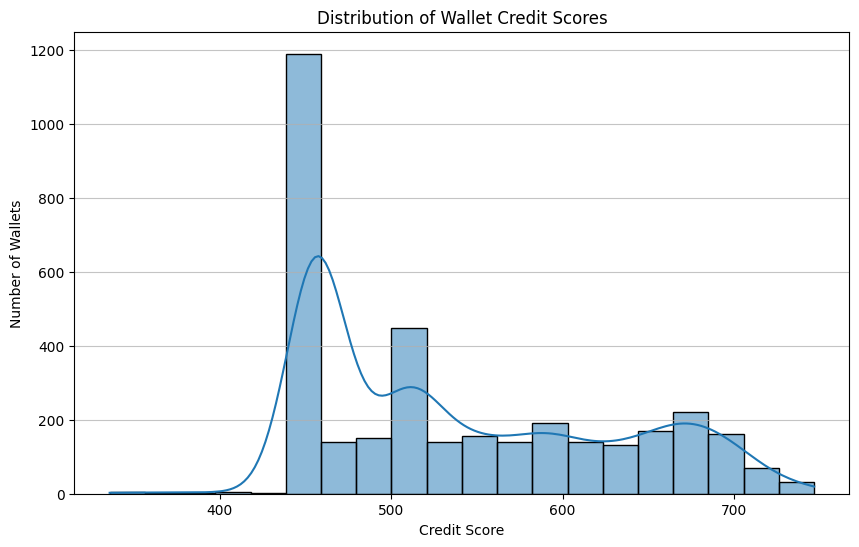

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(results_df['credit_score'], bins=20, kde=True)
plt.title('Distribution of Wallet Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Number of Wallets')
plt.grid(axis='y', alpha=0.75)
plt.show()

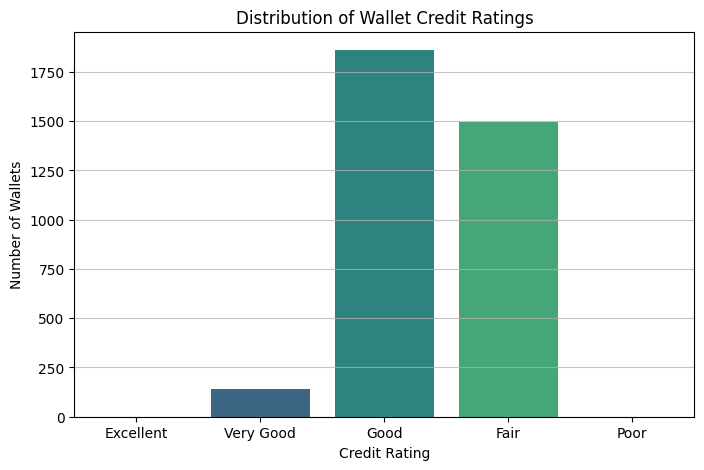

In [67]:
plt.figure(figsize=(8, 5))
sns.countplot(x='credit_rating', data=results_df, order=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], palette='viridis')
plt.title('Distribution of Wallet Credit Ratings')
plt.xlabel('Credit Rating')
plt.ylabel('Number of Wallets')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [69]:
# Define score ranges (bins)
bins = range(0, 1001, 100)
labels = [f'{i}-{i+99}' for i in bins[:-1]]

# Categorize scores into bins
results_df['score_range'] = pd.cut(results_df['credit_score'], bins=bins, labels=labels, right=False, include_lowest=True)

# Calculate the distribution
score_distribution = results_df['score_range'].value_counts().sort_index()

# Print the distribution
print("Distribution of Wallet Credit Scores Across Ranges:")
print(score_distribution)

Distribution of Wallet Credit Scores Across Ranges:
score_range
0-99          0
100-199       0
200-299       0
300-399      11
400-499    1483
500-599    1062
600-699     799
700-799     142
800-899       0
900-999       0
Name: count, dtype: int64


**Reasoning**:
The score distribution has been calculated. The next step is to visualize this distribution.



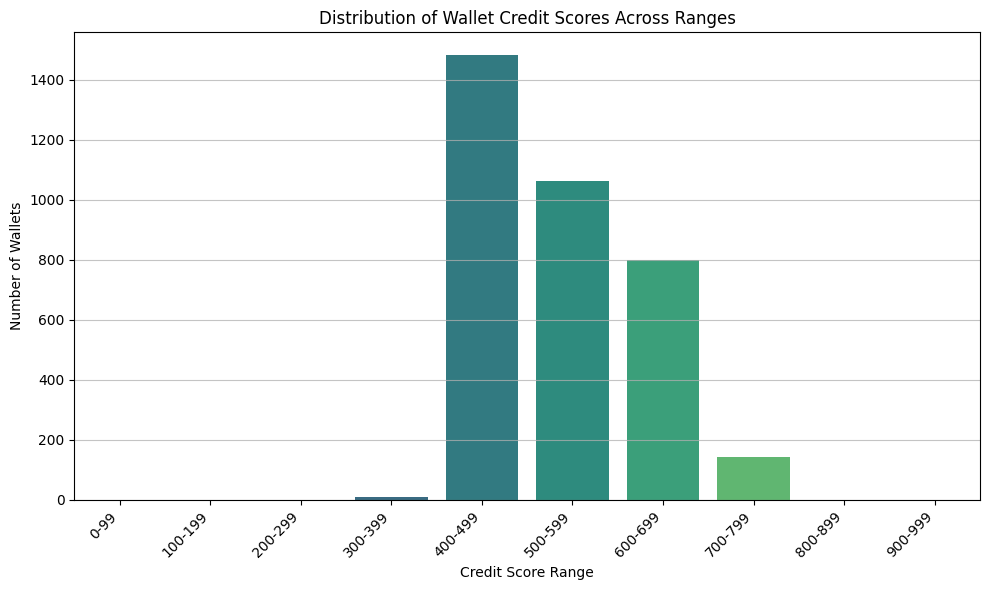

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x=score_distribution.index, y=score_distribution.values, palette='viridis')
plt.title('Distribution of Wallet Credit Scores Across Ranges')
plt.xlabel('Credit Score Range')
plt.ylabel('Number of Wallets')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [71]:
# Define lower and higher score ranges based on the distribution observed
# From the distribution, significant number of wallets are in 300-399, 400-499, 500-599, 600-699, 700-799
# Let's define lower as < 500 and higher as >= 600 for analysis
lower_score_range_df = results_df[results_df['credit_score'] < 500]
higher_score_range_df = results_df[results_df['credit_score'] >= 600]

print(f"Wallets in lower score range (< 500): {len(lower_score_range_df)}")
print(f"Wallets in higher score range (>= 600): {len(higher_score_range_df)}")

# Select key features for analysis based on feature importance
key_features = [
    'total_transactions',
    'total_volume_usd',
    'repay_to_borrow_ratio',
    'liquidation_frequency',
    'activity_hour_concentration',
    'unique_days_active',
    'activity_span_days',
    'avg_daily_transactions',
    'deposit_ratio',
    'borrow_ratio',
    'repay_ratio',
    'redeem_ratio',
    'was_liquidated'
]

print("\n--- Descriptive Statistics for Lower Score Wallets (< 500) ---")
display(lower_score_range_df[key_features].describe())

print("\n--- Descriptive Statistics for Higher Score Wallets (>= 600) ---")
display(higher_score_range_df[key_features].describe())

Wallets in lower score range (< 500): 1494
Wallets in higher score range (>= 600): 941

--- Descriptive Statistics for Lower Score Wallets (< 500) ---


,total_transactions,total_volume_usd,repay_to_borrow_ratio,liquidation_frequency,activity_hour_concentration,unique_days_active,activity_span_days,avg_daily_transactions,deposit_ratio,borrow_ratio,repay_ratio,redeem_ratio,was_liquidated
count,1494.000000,1.494000e+03,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,1.790495,6.321607e+02,0.012215,0.006521,0.966895,1.160643,2.730924,1.305160,0.830539,0.081355,0.002861,0.078723,0.025435
std,3.041731,5.336004e+03,0.106337,0.047396,0.115034,0.660555,8.425149,0.995905,0.290427,0.175939,0.023476,0.239849,0.157495
min,1.000000,9.473175e-13,0.000000,0.000000,0.129032,1.000000,1.000000,0.025316,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.795005e-01,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.106521e+00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,5.810755e+00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,93.000000,1.739386e+05,2.000000,0.750000,1.000000,8.000000,105.000000,13.285714,1.000000,1.000000,0.333333,1.000000,1.000000



--- Descriptive Statistics for Higher Score Wallets (>= 600) ---


,total_transactions,total_volume_usd,repay_to_borrow_ratio,liquidation_frequency,activity_hour_concentration,unique_days_active,activity_span_days,avg_daily_transactions,deposit_ratio,borrow_ratio,repay_ratio,redeem_ratio,was_liquidated
count,941.000000,9.410000e+02,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,90.478215,1.874265e+06,0.955933,0.000196,0.261534,18.524973,58.581296,2.125709,0.414252,0.198745,0.153104,0.233703,0.011690
std,476.303860,1.235318e+07,2.388998,0.002234,0.122050,18.497287,35.859374,7.987888,0.180722,0.107993,0.118373,0.179084,0.107542
min,4.000000,2.517799e-06,0.000000,0.000000,0.053067,1.000000,1.000000,0.069565,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,7.350957e+03,0.375000,0.000000,0.163462,6.000000,27.000000,0.437500,0.296296,0.130435,0.075000,0.115385,0.000000
50%,36.000000,3.518572e+04,0.714286,0.000000,0.238095,11.000000,59.000000,0.918919,0.405405,0.200000,0.142132,0.206897,0.000000
75%,85.000000,2.386899e+05,1.000000,0.000000,0.333333,24.000000,83.000000,2.101695,0.520833,0.263158,0.201613,0.305556,0.000000
max,14265.000000,2.088538e+08,65.000000,0.046512,0.888889,112.000000,154.000000,216.136364,1.000000,0.642857,0.735849,1.000000,1.000000
